In [4]:
import pandas as pd
import numpy as np
from nltk import ngrams
from igraph import *
import re
from itertools import combinations
from collections import OrderedDict
from nltk.tokenize import RegexpTokenizer



In [5]:
data='Information retrieval (IR) is the activity of obtaining information system resources relevant to an information need from a collection. Searches can be based on full-text or other content-based indexing. '

In [6]:
data

'Information retrieval (IR) is the activity of obtaining information system resources relevant to an information need from a collection. Searches can be based on full-text or other content-based indexing. '

In [10]:
def pre_proc(text):
    text=text.replace('.','')
    s = text.lower()
    # Replace all none alphanumeric characters with spaces
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    s=s.replace('  ',' ')
    return s
def co_ocur(text,n):
    C=[]
    s=pre_proc(text)
    # Break sentence in the token, remove empty tokens
    tokens = [token for token in s.split(" ") if token != ""]
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def graph_data(text):
    Item=[]
    for item in combinations(text.split(' '), 2):
        Item.append(item)
    return Item
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist
def get_Coour(data,n):
    graph_d=[]
    C=co_ocur(data,n)
    for each in C:
        graph_d.append(graph_data(each))
    flat_list = [item for sublist in graph_d for item in sublist]
    G_D=(list(OrderedDict.fromkeys(flat_list)))
    return G_D
def show_Graph(data,G_D):
    data=pre_proc(data)
    k=(unique_list(data.split(' ')))
    k.remove('')
    final_data=[]
    for each in G_D:
        x=(k.index(each[0]),k.index(each[1]))
        final_data.append(x)
    g = Graph(vertex_attrs={"label":k}, edges=final_data,directed=True)
    return plot(g,margin=20,vertex_label_size=11,vertex_size=0,vertex_label_dist=-3,edge_width=0.4,autocurve=True)

In [8]:
cor=get_Coour(data,3)

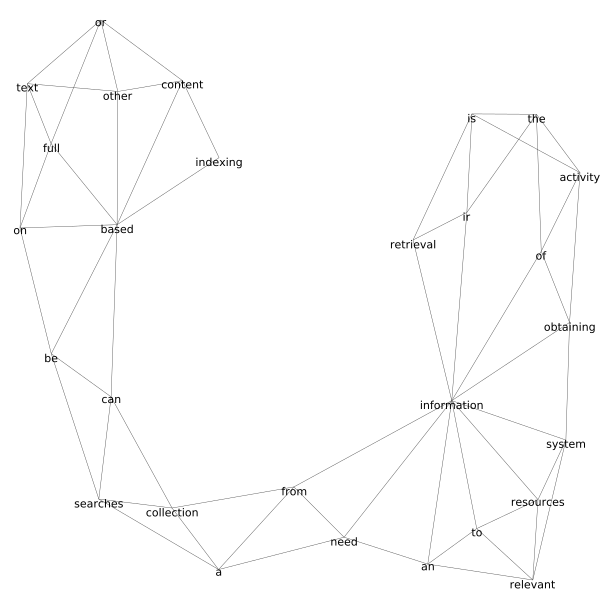

In [9]:
show_Graph(data,cor)